<a href="https://colab.research.google.com/github/KHATHARSYS/Data-Science-Projects-with-Python/blob/main/Classification_model_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification model performance analysis
Hreunder we show a dataset with information of the clients that have (or have not) bought a product. Considering two features (Age and Estimated Salary) we are going to build four classification models and assess its performance, then we will choice the best one.
The models for this case are:
*   Logistic Regression 

*   K Neirest Neghbors

*   Support Vector Machine

*   Random Forest

Let's load the packages that we will require

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import itertools
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next the data 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")
dataset.shape
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Logistic Regression model on the Training set


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

Training the KNN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

Training the SVM model on the Training set

In [ ]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear')

Training the RF model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=300)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

Predicting the Test set results

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)
y_pred_rf = classifier_rf.predict(X_test)
#print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

Making the Confusion Matrixes

In [ ]:
class_names=np.array(['0','1'])

def plot_confusion_matrix(cm, classes,
                          title,
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

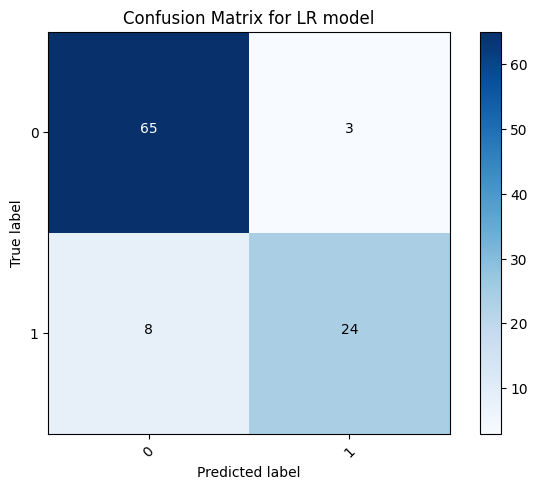

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr,class_names, title= "Confusion Matrix for LR model")

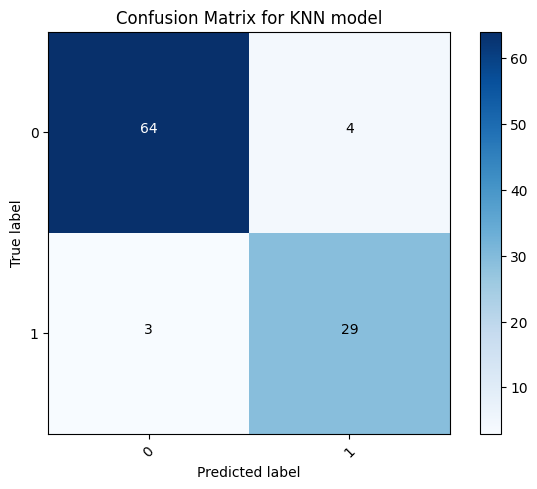

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn,class_names, title= "Confusion Matrix for KNN model")

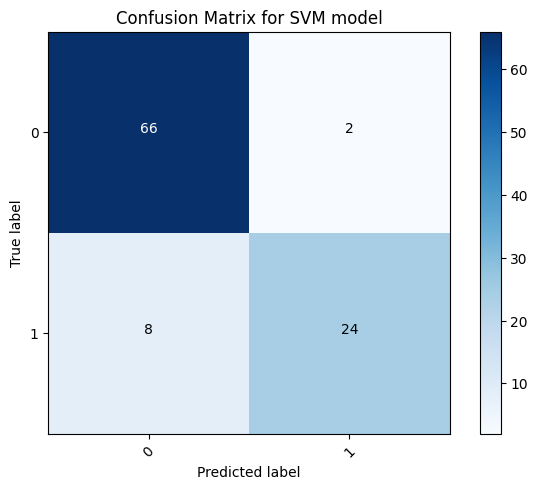

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm,class_names, title= "Confusion Matrix for SVM model")

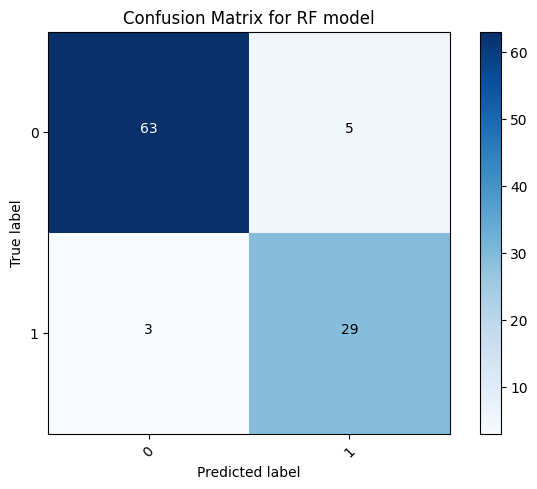

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf,class_names, title= "Confusion Matrix for RF model")

Accuracy Score LR model vs KNN model

In [ ]:
print(accuracy_score(y_test, y_pred_lr)," vs. ",accuracy_score(y_test, y_pred_knn), " vs. ", accuracy_score(y_test, y_pred_svm), " vs. ", accuracy_score(y_test, y_pred_rf))

0.89  vs.  0.93  vs.  0.9  vs.  0.92


True Positive Rate LR model vs KNN model



In [ ]:
from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test, y_pred_svm)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred_rf)
print("TPR LR model = ", tpr_lr[1]," vs. " , "TPR KNN model = ", tpr_knn[1]," vs. " , "TPR KNN model = ", tpr_svm[1]," vs. " , "TPR RF model = ", tpr_rf[1])

TPR LR model =  0.75  vs.  TPR KNN model =  0.90625  vs.  TPR KNN model =  0.75  vs.  TPR RF model =  0.90625


False Positive Rate LR model vs KNN model


In [ ]:
print("FPR LR model = ", fpr_lr[1]," vs. " , "FPR KNN model = ", fpr_knn[1]," vs. "  "FPR SVM model = ", fpr_svm[1]," vs. "  "FPR RF model = ", fpr_rf[1])

FPR LR model =  0.04411764705882353  vs.  FPR KNN model =  0.058823529411764705  vs. FPR SVM model =  0.029411764705882353  vs. FPR RF model =  0.07352941176470588


##Visualising the Test set results  for LR model

<ipython-input-21-3574e885951b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


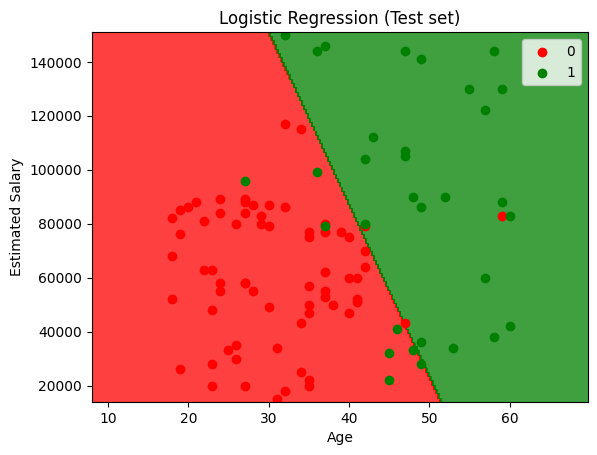

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Visualising the Test set results for KNN model

<ipython-input-22-1d06ab789014>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


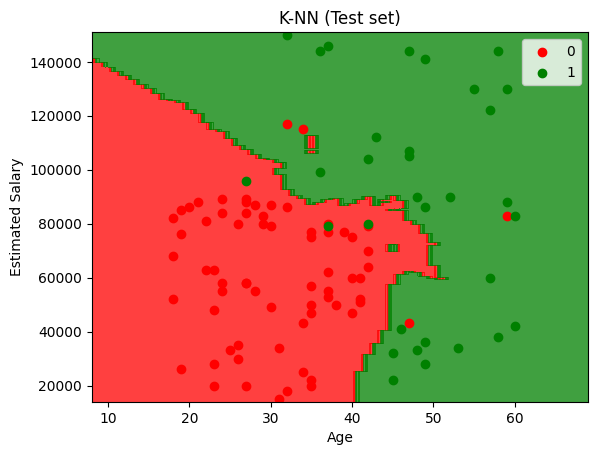

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Visualising the Test set results for SVM model

<ipython-input-40-a47c62596f7e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


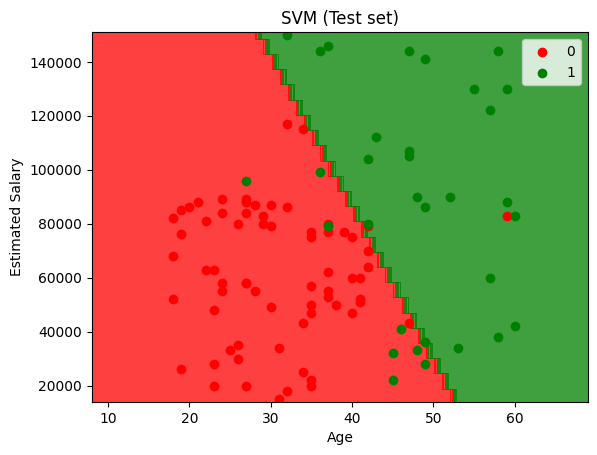

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Visualising the Test set results for RF model

<ipython-input-39-6cf81b537621>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


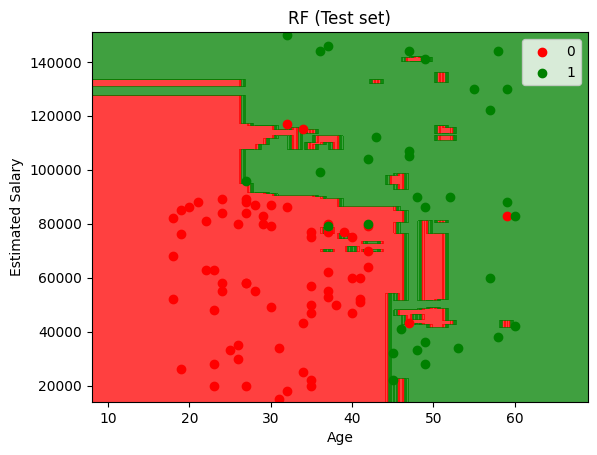

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RF (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##ROC CURVE

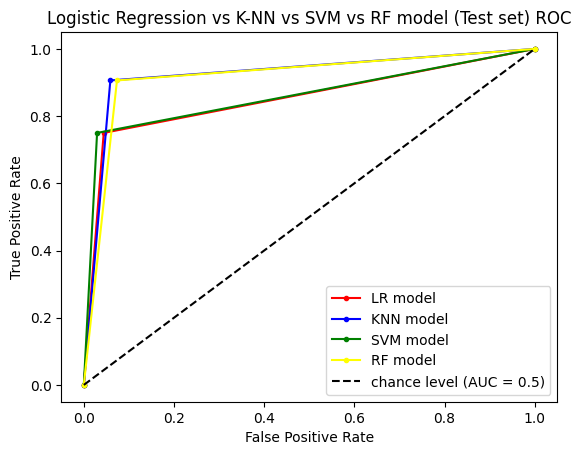

In [ ]:
plt.plot(fpr_lr, tpr_lr, marker=".", color = "red", label = "LR model")
plt.plot(fpr_knn, tpr_knn, marker=".", color = "blue", label = "KNN model")
plt.plot(fpr_svm, tpr_svm, marker=".", color = "green", label = "SVM model")
plt.plot(fpr_rf, tpr_rf, marker=".", color = "yellow", label = "RF model")
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.title('Logistic Regression vs K-NN vs SVM vs RF model (Test set) ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')

It is easy to visualize that  the KNN model has a better performance, because the area under its curve is clearly greater. Hereunder we show the results.

In [ ]:
print("Area under the ROC curve for LR model", roc_auc_score(y_test, y_pred_lr), "vs" ,"Area under the ROC curve for KNN model", roc_auc_score(y_test, y_pred_knn), 
      "vs" ,"Area under the ROC curve for SVM model", roc_auc_score(y_test, y_pred_svm), "vs" ,"Area under the ROC curve for RF model", roc_auc_score(y_test, y_pred_rf))

Area under the ROC curve for LR model 0.8529411764705883 vs Area under the ROC curve for KNN model 0.9237132352941176 vs Area under the ROC curve for SVM model 0.8602941176470588 vs Area under the ROC curve for RF model 0.9163602941176471
